## <b><i>Análise Exploratória de Dados</i></b><br>Smartphone<br><br>
<b>Carregamento e pré-visualização dos dados:

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/redsonlopez/ds/main/datasets/smartphone.csv")
df.head(3)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0


<b>Dimensão do conjunto de dados:

In [2]:
print(f"O conjunto de dados possui {df.shape[0]} observações\
 e {df.shape[1]} variáveis")

O conjunto de dados possui 980 observações e 25 variáveis


<b>Visualização e renomeação das colunas:

In [3]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [4]:
df.rename(columns= {'brand_name': 'Marca', 'model': 'Modelo', 'price': 'Preço', 'rating': 'Avaliacao', 'has_5g': '5G', 'has_nfc': 'NFC',
'has_ir_blaster': 'IR_Blaster', 'processor_brand': 'Marca_Processador', 'num_cores': 'Qtd_Cores', 'processor_speed': 'Veloc_Processador',
'battery_capacity': 'Capac_Bateria', 'fast_charging_available': 'Carreg_Rápido_Disp', 'fast_charging': 'Carreg_Rápido',
'ram_capacity': 'Capacidade_Ram', 'internal_memory': 'Memória_Interna', 'screen_size': 'Tamanho_Tela', 'refresh_rate': 'Taxa_Atualização',
'resolution': 'Resolução', 'num_rear_cameras': 'Qtd_Câm_Tras', 'num_front_cameras': 'Qtd_Câm_Front', 'os': 'Sistema_Operacional',
'primary_camera_rear': 'Câm_Tras_Principal', 'primary_camera_front': 'Câm_Front_Principal',
'extended_memory_available': 'Memória_Esten_Disp', 'extended_upto': 'Expansível_Até'}, inplace = True)

<b>Frequencia de resultados unicos para cada coluna:

In [5]:
df.nunique()

Marca                   46
Modelo                 980
Preço                  379
Avaliacao               30
5G                       2
NFC                      2
IR_Blaster               2
Marca_Processador       13
Qtd_Cores                3
Veloc_Processador       35
Capac_Bateria           89
Carreg_Rápido_Disp       2
Carreg_Rápido           32
Capacidade_Ram           9
Memória_Interna          8
Tamanho_Tela            79
Taxa_Atualização         6
Resolução               83
Qtd_Câm_Tras             4
Qtd_Câm_Front            2
Sistema_Operacional      3
Câm_Tras_Principal      18
Câm_Front_Principal     24
Memória_Esten_Disp       2
Expansível_Até           7
dtype: int64

<b>Porcentagem dos valores no conjunto de dados que estão nulos:

In [6]:
import numpy as np

nulos= df.isnull().sum()

total_valores= np.product(df.shape)
total_nulos= nulos.sum()

porcentagem_nulos= (total_nulos / total_valores) * 100

print(f"Porcentagem de valores nulos: {round(porcentagem_nulos, 2)}%")

Porcentagem de valores nulos: 3.65%


<b>Informações como tipos de dados e quantidade de valores não nulos:<br>
(Com os nomes das colunas atualizados para Português-BR)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marca                980 non-null    object 
 1   Modelo               980 non-null    object 
 2   Preço                980 non-null    int64  
 3   Avaliacao            879 non-null    float64
 4   5G                   980 non-null    bool   
 5   NFC                  980 non-null    bool   
 6   IR_Blaster           980 non-null    bool   
 7   Marca_Processador    960 non-null    object 
 8   Qtd_Cores            974 non-null    float64
 9   Veloc_Processador    938 non-null    float64
 10  Capac_Bateria        969 non-null    float64
 11  Carreg_Rápido_Disp   980 non-null    int64  
 12  Carreg_Rápido        769 non-null    float64
 13  Capacidade_Ram       980 non-null    float64
 14  Memória_Interna      980 non-null    float64
 15  Tamanho_Tela         980 non-null    flo

<b>Testando a remoção de linhas e colunas com valores nulos

In [8]:
drop_rows= df.dropna() # Remove linhas com valores nulos
print("Registros perdidos removendo linhas com valores nulos: ", df.shape[0] - drop_rows.shape[0], f"do total de {df.shape[0]}")

drop_columns= df.dropna(axis= 1) # Remove colunas com valores nulos
print("Atributos perdidos removendo colunas com valores nulos: ", df.shape[1] - drop_columns.shape[1], f"do total de {df.shape[1]}")

Registros perdidos removendo linhas com valores nulos:  628 do total de 980
Atributos perdidos removendo colunas com valores nulos:  10 do total de 25


<b>Preenchimento dos valores nulos:

In [9]:
# Substitui nulos numéricos pela média dos valores de sua coluna
df = df.fillna(df.mean(numeric_only=True))

# Substitui nulos usando "backward fill" e em seguida substitui nulos restantes usando "forward fill"
df= df.fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)
df.isna().sum()

Marca                  0
Modelo                 0
Preço                  0
Avaliacao              0
5G                     0
NFC                    0
IR_Blaster             0
Marca_Processador      0
Qtd_Cores              0
Veloc_Processador      0
Capac_Bateria          0
Carreg_Rápido_Disp     0
Carreg_Rápido          0
Capacidade_Ram         0
Memória_Interna        0
Tamanho_Tela           0
Taxa_Atualização       0
Resolução              0
Qtd_Câm_Tras           0
Qtd_Câm_Front          0
Sistema_Operacional    0
Câm_Tras_Principal     0
Câm_Front_Principal    0
Memória_Esten_Disp     0
Expansível_Até         0
dtype: int64

<b>Dimensionamento da variável Avaliação

In [10]:
np.random.seed(0) # Define sementes para a reprodutibilidade aleatória

from mlxtend.preprocessing import minmax_scaling # para escala min_max (0 - 1)
original_data= pd.DataFrame(df.Avaliacao)

scaled_data= minmax_scaling(original_data, columns= ["Avaliacao"], min_val= 1, max_val= 10)

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    Avaliacao
0       89.0
1       81.0
2       75.0
3       81.0
4       82.0
Minimum value: 60.0 
Maximum value: 89.0
______________________________

Scaled data
Preview:
    Avaliacao
0  10.000000
1   7.517241
2   5.655172
3   7.517241
4   7.827586
Minimum value: 1.0 
Maximum value: 10.0


<b>Normalização da variável Avaliação

In [11]:
from scipy import stats # para transformação "Curva em Sino"
index_normalization= scaled_data.Avaliacao > 0 # Para lembrar que Box-Cox aceita apenas valores positivos?
positive_normalization= scaled_data.Avaliacao.loc[index_normalization] # Obtendo os valores usando o índice
normalized= pd.Series(stats.boxcox(positive_normalization)[0],
                              name= "Avaliacao", index= positive_normalization.index) # Normalizando os valores


print('Original data\nPreview:\n', positive_normalization.head())
print('Minimum value:', float(positive_normalization.min()),
      '\nMaximum value:', float(positive_normalization.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized.head())
print('Minimum value:', float(normalized.min()),
      '\nMaximum value:', float(normalized.max()))

Original data
Preview:
 0    10.000000
1     7.517241
2     5.655172
3     7.517241
4     7.827586
Name: Avaliacao, dtype: float64
Minimum value: 1.0 
Maximum value: 10.0
______________________________

Normalized data
Preview:
 0    24.130132
1    15.068517
2     9.335787
3    15.068517
4    16.115960
Name: Avaliacao, dtype: float64
Minimum value: 0.0 
Maximum value: 24.13013181589357


In [12]:
df["Avaliacao"]= round(scaled_data, 2)

<b>Conversão da variável Preço em Rupia indiana(INR) para o Real Brasileiro(BRL).<br>(Valores aproximados, sem a adição dos impostos nacionais).

In [13]:
df['Preço'] = round(df['Preço'] * 0.07)

<b>Alteração de dados em "Quantidade de Cores" e "Quantidade de Câmeras Frontais", do tipo ponto flutuante para inteiros:

In [14]:
df[['Qtd_Cores', 'Qtd_Câm_Front']] = df[['Qtd_Cores', 'Qtd_Câm_Front']].astype(int)
df.head(1)

,Marca,Modelo,Preço,Avaliacao,5G,NFC,IR_Blaster,Marca_Processador,Qtd_Cores,Veloc_Processador,...,Tamanho_Tela,Taxa_Atualização,Resolução,Qtd_Câm_Tras,Qtd_Câm_Front,Sistema_Operacional,Câm_Tras_Principal,Câm_Front_Principal,Memória_Esten_Disp,Expansível_Até
0,oneplus,OnePlus 11 5G,3850.0,10.0,True,True,False,snapdragon,8,3.2,...,6.7,120,1440 x 3216,3,1,android,50.0,16.0,0,736.064


<b>Informações estatísticas, como valores mínimos, médios e máximos:

In [15]:
df.describe()

,Preço,Avaliacao,Qtd_Cores,Veloc_Processador,Capac_Bateria,Carreg_Rápido_Disp,Carreg_Rápido,Capacidade_Ram,Memória_Interna,Tamanho_Tela,Taxa_Atualização,Qtd_Câm_Tras,Qtd_Câm_Front,Câm_Tras_Principal,Câm_Front_Principal,Memória_Esten_Disp,Expansível_Até
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,2276.387755,6.667704,7.767347,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029592,50.319286,16.589128,0.630612,736.064000
std,2767.214079,2.176726,0.836449,0.454026,1003.852459,0.353205,30.360092,2.744378,107.134516,0.349162,28.988052,0.776441,0.169545,33.000968,10.848992,0.482885,261.939271
min,245.000000,1.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,910.000000,5.660000,8.000000,2.050000,4500.000000,1.000000,25.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,736.064000
50%,1399.500000,6.900000,8.000000,2.400000,5000.000000,1.000000,45.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,736.064000
75%,2484.250000,8.450000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,45500.000000,10.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


<b>Configurações para os gráficos:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 6) # Tamanho padrão para as figuras em polegadas
plt.rcParams['xtick.labelsize'] = 10 # Tamanho padrão da fonte das legendas no eixo x
plt.rcParams['ytick.labelsize'] = 10 # Tamanho padrão da fonte das legendas no eixo y
plt.rcParams['font.size'] = 10 # Tamanho padrão da fonte do texto
plt.rcParams['axes.titlesize'] = 12 # Tamanho padrão da fonte do título dos eixos

plt.rcParams['axes.spines.top'] = False # Remove borda superior dos gráficos
plt.rcParams['axes.spines.right'] = False # Remove borda direita dos gráficos

<b>Nomes das marcas contidas no conjunto de dados:

In [17]:
df['Marca'].unique()

array(['oneplus', 'samsung', 'motorola', 'realme', 'apple', 'xiaomi',
       'nothing', 'oppo', 'vivo', 'poco', 'iqoo', 'jio', 'gionee',
       'tecno', 'tesla', 'google', 'infinix', 'cola', 'letv', 'ikall',
       'leeco', 'duoqin', 'nokia', 'lava', 'honor', 'nubia', 'redmi',
       'asus', 'itel', 'royole', 'sony', 'oukitel', 'vertu', 'blu', 'lyf',
       'huawei', 'zte', 'lenovo', 'lg', 'micromax', 'leitz', 'cat',
       'doogee', 'tcl', 'sharp', 'blackview'], dtype=object)

<b>Marcas com maior diversidade de modelos contidos no conjunto de dados:

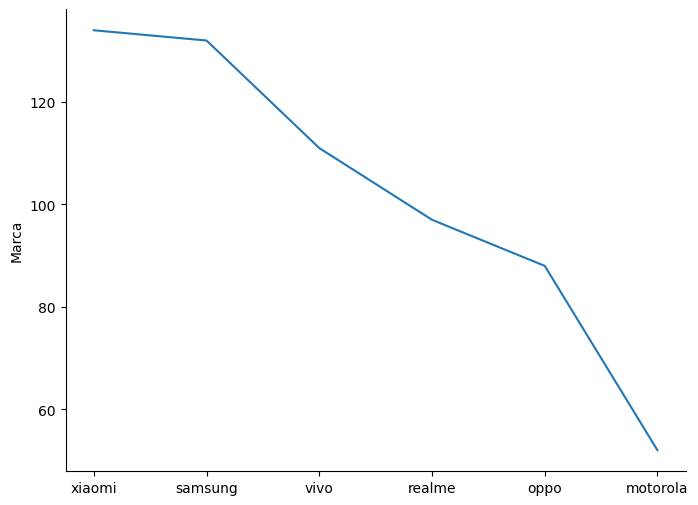

In [18]:
marcas= df["Marca"].value_counts()
sns.lineplot(marcas[marcas > 50]);

<b>Variação geral dos preços de smartphones:

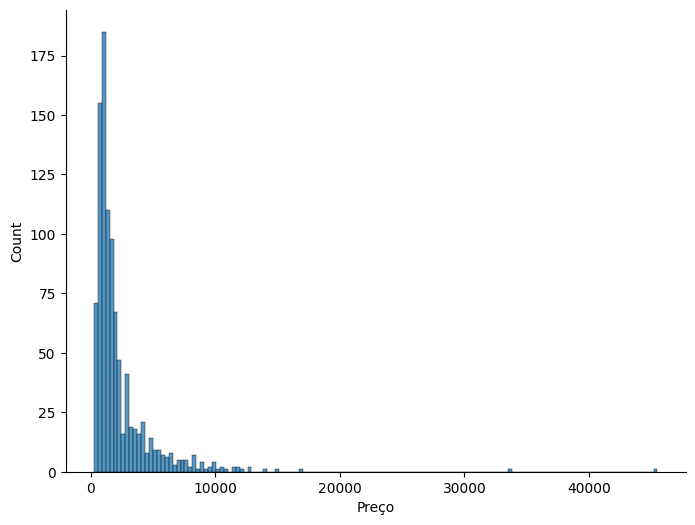

In [19]:
sns.histplot(df['Preço']);

<b>Visualização gráfica da relação entre avaliação, preço e velocidade do processador:

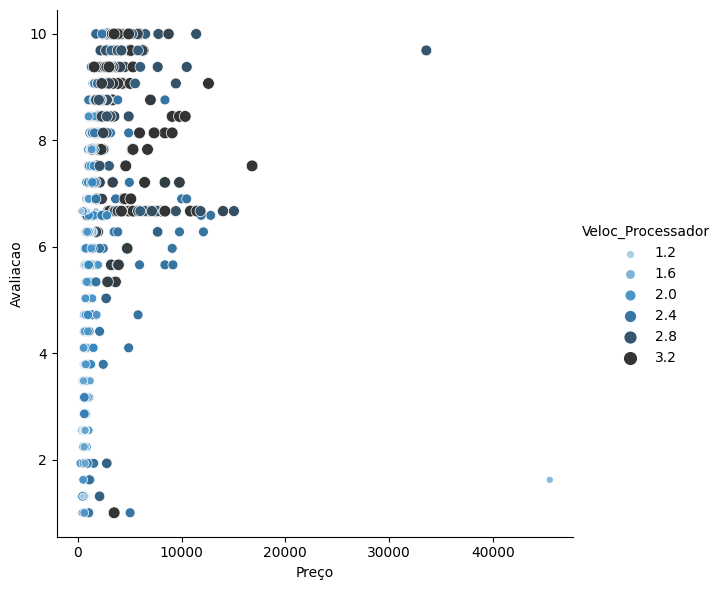

In [20]:
sns.relplot(x= df['Preço'], y= df['Avaliacao'], size= df['Veloc_Processador'],
            hue= df['Veloc_Processador'], palette= 'Blues_d', height= 6);

<b>No lado direito inferior do gráfico há um ponto(outlier?) que representa um smartphone com avaliação abaixo de 6.5,<br>processador inferior a 1.6 e preço acima de R$40.000,00.<br><br>
Utilizando um filtro foi possível localizar o smartphone 'Vertu Signature Touch':<br>(Um Smartphone de Luxo)

In [21]:
df[(df['Preço']>40000)]

,Marca,Modelo,Preço,Avaliacao,5G,NFC,IR_Blaster,Marca_Processador,Qtd_Cores,Veloc_Processador,...,Tamanho_Tela,Taxa_Atualização,Resolução,Qtd_Câm_Tras,Qtd_Câm_Front,Sistema_Operacional,Câm_Tras_Principal,Câm_Front_Principal,Memória_Esten_Disp,Expansível_Até
427,vertu,Vertu Signature Touch,45500.0,1.62,False,True,False,snapdragon,8,1.5,...,4.7,60,1080 x 1920,1,1,android,13.0,2.1,0,736.064


<b>Criação de filtro para smartphones com melhores custo benefício e gráfico diagrama de caixa, com informações como a mediana de seus preços:

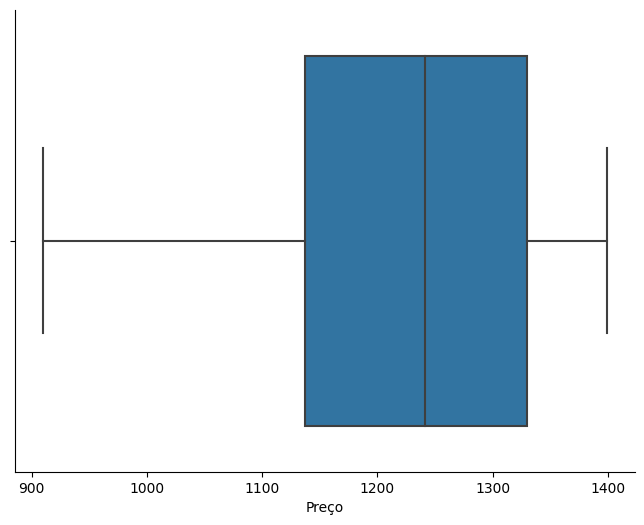

In [22]:
df_filtro= df.filter(['Modelo', 'Capacidade_Ram', 'Memória_Interna', 'Veloc_Processador',
                      'Câm_Tras_Principal', 'NFC','Capac_Bateria', 'Avaliacao', 'Preço'])

filtro_0= df_filtro[(df_filtro['Preço'] <= 1399.50) & (df_filtro['NFC'] == True) &
 (df_filtro['Capacidade_Ram'] >= 6.0) & (df_filtro['Memória_Interna'] >= 128.)\
& (df_filtro['Câm_Tras_Principal'] >= 8.)].sort_values(by= 'Preço', ascending= True)

sns.boxplot(x = filtro_0['Preço']);

<b>Visualização dos 13 primeiros smartphones com melhores custo benefício:

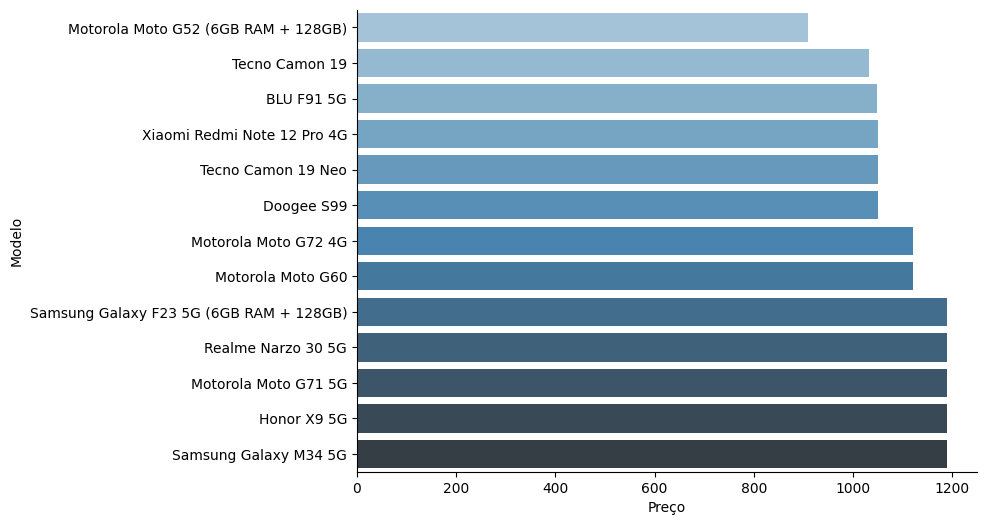

In [23]:
filtro_1= filtro_0[:13]
sns.barplot(y= filtro_1['Modelo'], x= filtro_1['Preço'], palette="Blues_d");

<b>Gráfico com modelos e preços de smartphones com memória RAM de 8 ou mais, memória interna de 264 ou mais e <br>câmera de 50 megapixels ou mais:

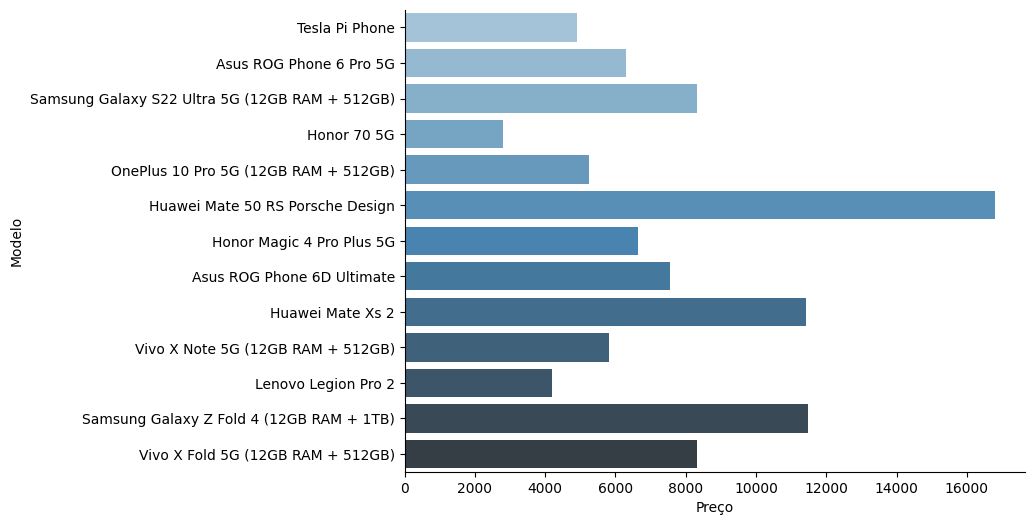

In [24]:
filtro_2= df_filtro[(df_filtro['NFC'] == True) & (df_filtro['Capacidade_Ram'] >= 8.0)
& (df_filtro['Memória_Interna'] >= 264.) & (df_filtro['Câm_Tras_Principal'] >= 50.0)]

sns.barplot(y= filtro_2['Modelo'], x= filtro_2['Preço'], palette="Blues_d");

Para gravar um novo arquivo com as alterações feitas no conjunto de dados, use o código:<br>
<i>df.to_csv('caminho_armazenamento_arquivo.csv', index=False)</i><br><br>

Conjunto de Dados utilizado para a análise foi disponibilizado por [smit-autade](https://www.kaggle.com/smitautade)